<a href="https://colab.research.google.com/github/Bioinformatics-Partimer/drug-discovery/blob/main/cancer%20gene%20expression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import python libraries

In [4]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split # Changed 'modek_selection' to 'model_selection'
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler # Changed 'reprocessing' to 'preprocessing'
from sklearn.preprocessing import label_binarize # Changed 'Label_binarize' to 'label_binarize'

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

#performance matrics
from sklearn.metrics import balanced_accuracy_score, f1_score, precision_score, recall_score # Changed 'fi_score' to 'f1_score' and 'predction_score' to 'precision_score'
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc # Changed 'matrics' to 'metrics'
from sklearn.metrics import roc_auc_score




taking data dorectly from github repository

In [5]:
file_url='https://github.com/vappiah/Machine-Learning-Tutorials/raw/main/datasets/cancer_gene_expression.zip'

dataframe=pd.read_csv(file_url)


Data exploring and cleaning

In [6]:
#lets check the number of samples and features
#note the last column contain the labels. its i not considered as a feature
print(dataframe.shape)

(801, 8001)


In [7]:
#lets check some of the columns first, second and third columns
print(dataframe.columns[0:3])

Index(['gene_1', 'gene_2', 'gene_3'], dtype='object')


In [8]:
#lets check the name of the last column of this dataframe
dataframe.columns[-1]

'Cancer_Type'

In [9]:
#check the missing values
datanul=dataframe.isnull().sum()
g=[i for i in datanul if i>0]
print('columns with missing values:%d'%len(g))

columns with missing values:0


In [10]:
#lets check how many cancer types are there in the data

print(dataframe['Cancer_Type'].value_counts())

Cancer_Type
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64


Data preprocessing

this done to put the data in an appropriate formate before modellling


In [11]:
#we will now seperate the feature values from the class
#we do this because this scikit-learn requires that features and class are eparated before parsing them to the classifiers.

x=dataframe.iloc[:,0:-1]
y=dataframe.iloc[:,-1]
x.shape
y.shape

(801,)

Encode labels

In [12]:
#lets encode target labels y with values between 0 and n_classes-1
#encoding will be done using the label encoder

label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoder=label_encoder.transform(y)
labels=label_encoder.classes_ # Fixed: Accessing 'classes_' attribute
classes=np.unique(y_encoder)   # Fixed: Using 'y_encoder' instead of 'y_encoded'

In [13]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [14]:
classes

array([0, 1, 2, 3, 4])

Data splitting


We will now split the data into training and test subsets. The training data is initially parsed to the machine learning model. this is to enable the model to identify discriminatory patterns which can be used to make future predictions. The testing data is used to evaluate the model after the training phase.

In [15]:
#split data into traning and test sets
#split data into traning and test sets
x_train,x_test,y_train,y_test=train_test_split(x,y_encoder,test_size=0.2,random_state=42) # Changed 'y_encoded' to 'y_encoder'

In [16]:
dataframe.iloc[:0:10].describe()

,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7991,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Data Normalization

data normalization is done so that the values are in the same range. this will improve model performance and avoid bias

In [17]:
#scale data between 0 and 1

min_max_scaler=MinMaxScaler()
x_train_norm=min_max_scaler.fit_transform(x_train)
x_test_norm=min_max_scaler.fit_transform(x_test)


Feature selection

The purpose of feature selection is to select relevant features for classification. Feature selection is usually used as a pre-processing step before doing the actual learning.

mutual information algorithm is used to compute the relevance of each feature. The top n (eg. 300) features are selected for the machine learning analysis.

In [18]:
# Ensure mutual_info_classif is correctly imported
from sklearn.feature_selection import mutual_info_classif

# Now, you should be able to use the function:
MI = mutual_info_classif(x_train_norm, y_train) # x_train_norm is now defined

In [22]:
n_features=300
selected_scores_indices=np.argsort(MI)[::-1][0:n_features] # Fixed: Changed 'selected_scores_indies' to 'selected_scores_indices'

x_train_selected=x_train_norm[:,selected_scores_indices]
x_test_selected=x_test_norm[:,selected_scores_indices]

In [23]:
x_train_selected.shape

(640, 300)

In [24]:
x_test_selected.shape

(161, 300)

Classification

the random forest classifier is used. random forest works with multiclass and high dimensional data. classification will involve traning and testing of the model

model training

training allows the machine learning model to learn from the data and use the identified pattens to predict the outcomes of data it has never seen before.

In [25]:
RF=OneVsRestClassifier(RandomForestClassifier(max_features=0.2))
RF.fit(x_train_selected,y_train)
y_pred=RF.predict(x_test_selected)
pred_prob = RF.predict_proba(x_test_selected)

Model Evaluation

After training the model, it is important to know how the model performs on an independent data(i.e. the test data). The following metrics are used to evaluate the model

accuracy
precision
recall
f1 score
confusion matrix
ROC Curve

In [27]:
#accuracy
accuracy=np.round(balanced_accuracy_score(y_test,y_pred),4)
print('accuracy:%0.4f'%accuracy)

accuracy:0.9675


In [28]:
#precision
precision=np.round(precision_score(y_test,y_pred,average = 'weighted'),4)
print('pressision:%0.4f'%precision)

pressision:0.9754


In [30]:
#recall
recall=np.round(recall_score(y_test,y_pred,average = 'weighted'),4)
print('recall:%0.4f'%recall)

recall:0.9752


In [34]:
#f1score
f1score=np.round(f1_score(y_test,y_pred,average = 'weighted'),4)
print('f1score:%0.4f'%f1score)

f1score:0.9751


In [35]:
report=classification_report(y_test,y_pred,target_names=labels)
print('\n, classification report\n\n')
print(report)



, classification report


              precision    recall  f1-score   support

        BRCA       0.97      0.98      0.98        60
        COAD       1.00      0.94      0.97        16
        KIRC       1.00      1.00      1.00        28
        LUAD       0.92      0.92      0.92        24
        PRAD       1.00      1.00      1.00        33

    accuracy                           0.98       161
   macro avg       0.98      0.97      0.97       161
weighted avg       0.98      0.98      0.98       161



In [37]:
#generate confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm_df=pd.DataFrame(cm,index=labels,columns=labels)
cm_df

,BRCA,COAD,KIRC,LUAD,PRAD
BRCA,59,0,0,1,0
COAD,0,15,0,1,0
KIRC,0,0,28,0,0
LUAD,2,0,0,22,0
PRAD,0,0,0,0,33


Text(50.722222222222214, 0.5, 'True Labels')

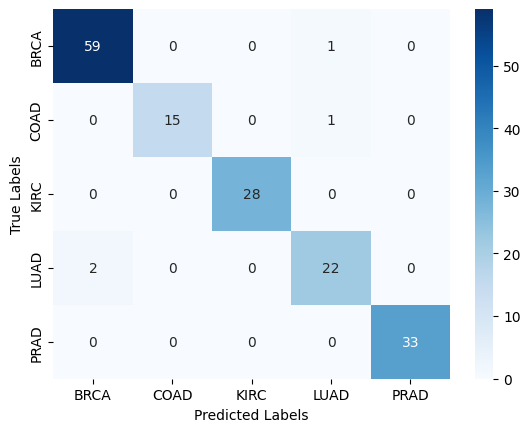

In [38]:
#visualize the confusion matrix using seaborn
sns.heatmap(cm_df, annot=True,cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

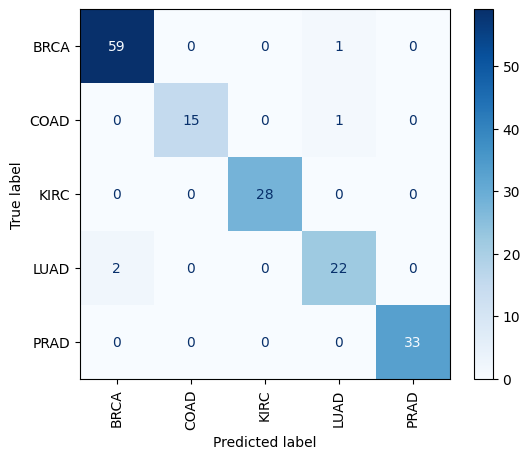

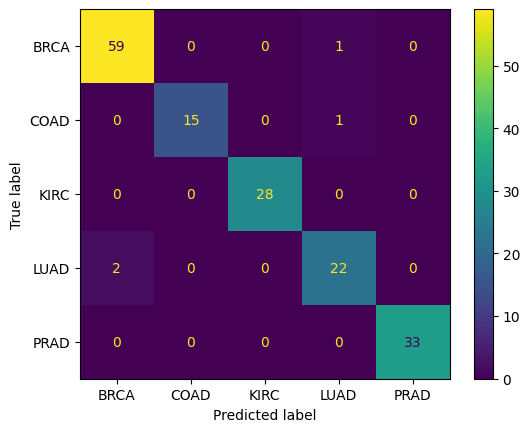

In [50]:
disp = ConfusionMatrixDisplay.from_estimator(
    RF,
    x_test_selected,
    y_test,
    xticks_rotation='vertical',
    cmap='Blues',
    display_labels=labels
)
disp.plot()

In [ ]:
#roc curves will be generated for each class
#therefore have to binarize the y_test labels
#this is done because the probabilities(pred_prob) are calculated for each each class
#we therefore need to put the y_test label in the same format as the pred_prob

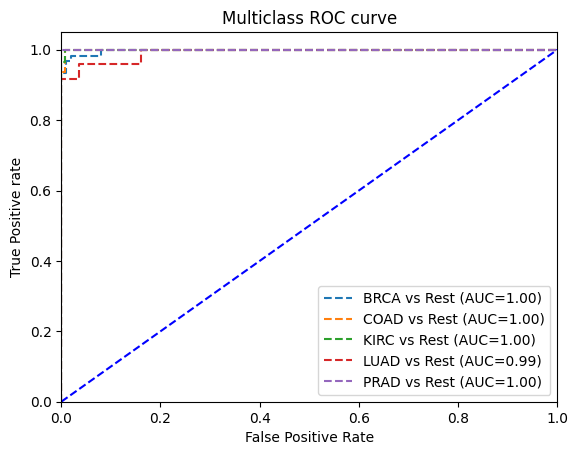

In [51]:
y_test_binarized=label_binarize(y_test,classes=classes)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()

n_class = classes.shape[0]

for i in range(n_class):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])

    # plotting
    plt.plot(fpr[i], tpr[i], linestyle='--',
             label='%s vs Rest (AUC=%0.2f)'%(labels[i],roc_auc[i]))

plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='lower right')
plt.show()